# A easy method to detect rearing

By taking the following two into consideration

    1. the speed of Rat(not sure whether it should be on the planar or the z axis)
    2. the height of the rat(z axis) 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from base import MultiDaysBeaconPosition, BeaconPosition
from scipy.stats import sem
from utils.basic_utils import calculate_cumulative_distribution, get_tags
from utils.baseline_method import determine_rearing_period

In [2]:
root_path = '../Data/Raw/'
rat_id = 'FS10'
rat_subdirectories = glob(root_path+rat_id+'/*/' )
print(rat_subdirectories)

['../Data/Raw/FS10/BPositions_FS10_20211025-143051/', '../Data/Raw/FS10/BPositions_FS10_20211101-184002/', '../Data/Raw/FS10/BPositions_FS10_20211015-161036/', '../Data/Raw/FS10/BPositions_FS10_20211103-135341/', '../Data/Raw/FS10/BPositions_FS10_20211022-142453/', '../Data/Raw/FS10/BPositions_FS10_20211014-160224/', '../Data/Raw/FS10/BPositions_FS10_20211029-155803/', '../Data/Raw/FS10/BPositions_FS10_20211007-150456/', '../Data/Raw/FS10/BPositions_FS10_20211026-152717/', '../Data/Raw/FS10/BPositions_FS10_20211023-191308/', '../Data/Raw/FS10/BPositions_FS10_20211019-170531/', '../Data/Raw/FS10/BPositions_FS10_20211011-094820/', '../Data/Raw/FS10/BPositions_FS10_20211102-210824/', '../Data/Raw/FS10/BPositions_FS10_20211027-184908/', '../Data/Raw/FS10/BPositions_FS10_20211006-154014/']


In [3]:
tags = get_tags(rat_subdirectories)
print(tags)

['20211025-143051', '20211101-184002', '20211015-161036', '20211103-135341', '20211022-142453', '20211014-160224', '20211029-155803', '20211007-150456', '20211026-152717', '20211023-191308', '20211019-170531', '20211011-094820', '20211102-210824', '20211027-184908', '20211006-154014']


In [4]:
this_tag = BeaconPosition(rat_subdirectories[0], tags[0], True, True)

In [5]:
unit_time = np.mean(this_tag.position_data[1:,0] - this_tag.position_data[:-1,0])
print(unit_time)

0.016694419627324594


In [13]:
this_tag.position_data.shape

(108578, 7)

# 1. whether speed on z axis correlate with rearing?

## calculate speed on both xy planar and z axes

In [6]:
speed = np.insert(this_tag.speed,0,0) # insert 0 at the beginning of the speed array to make the size same
z_speed = np.divide(this_tag.position_data[1:,3] - this_tag.position_data[:-1,3], this_tag.position_data[1:,0] - this_tag.position_data[:-1,0])
z_speed = np.insert(z_speed,0,0) # insert 0 at the beginning of the speed array to make the size same 

## determine rearing time point and the positive/negative z speed

In [7]:
threshold = 0.65
rear_idx = np.hstack(np.argwhere(this_tag.position_data[:,3]>= threshold))
print(rear_idx.shape)

(11609,)


In [8]:
pos_speed_idx = np.hstack(np.argwhere(z_speed>0))
neg_speed_idx = np.hstack(np.argwhere(z_speed<-0))
zero_speed_idx = np.hstack(np.argwhere(z_speed==0))

In [16]:
z=this_tag.position_data[:,3]
print(z.shape)

(108578,)


## 1.3 plot [-100,100] bins of the z around the rearing idx under different z_speed conditions

Text(0.5, 1.0, 'Cumulative distribution of z axis speed of rat FS10')

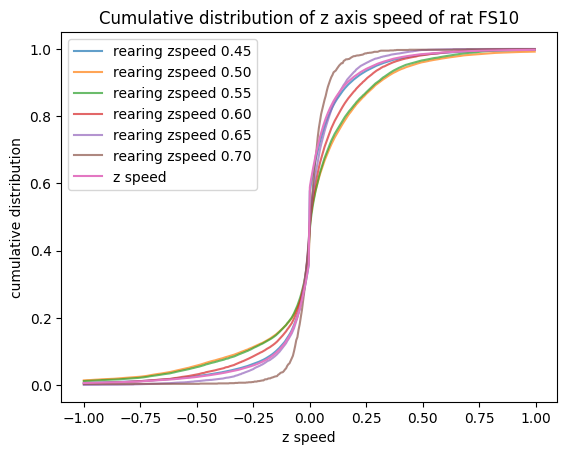

In [20]:
thresholds = [0.45,0.50,0.55,0.60,0.65,0.7]
for i,thresh in enumerate(thresholds):
    rear_idx = np.hstack(np.argwhere(this_tag.position_data[:,3]>= thresh))
    
    rearing_zspeed = z_speed[rear_idx]

    x_line, cd_rearing_zspeed = calculate_cumulative_distribution(rearing_zspeed, 0.005, set_max=True, max_x= 1, set_min= True, min_x= -1)
    x_line, cd_zspeed = calculate_cumulative_distribution(z_speed, 0.005, set_max=True, max_x= 1, set_min= True, min_x= -1)
    
    plt.plot(x_line, cd_rearing_zspeed, label ='rearing zspeed %.2f'%thresh, alpha = 0.7)
plt.plot(x_line, cd_zspeed, label = 'z speed', )
plt.legend()
plt.xlabel('z speed')
plt.ylabel('cumulative distribution')

plt.title('Cumulative distribution of z axis speed of rat %s'% rat_id)


## 1.4 plot the cumulate distribution of the height


In [26]:
x_line, cdspped = calculate_cumulative_distribution(z_speed,0.005)

Text(0, 0.5, 'cumulative distribution')

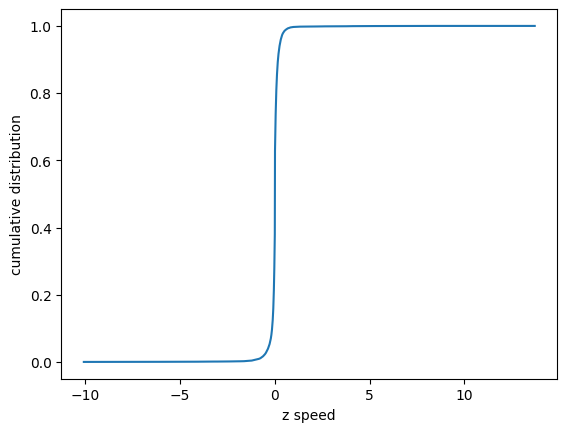

In [27]:
plt.plot(x_line, cdspped)
plt.xlabel('z speed')
plt.ylabel('cumulative distribution')

# 2. whether speed on x-y planar correlate rearing

## 2.1 calcualte speed and plot distribution

In [28]:
xy_speed = np.insert(this_tag.speed,0,0) # insert 0 at the beginning of the speed array to make the size same

x_line, cd_xyspeed = calculate_cumulative_distribution(xy_speed, 0.005,set_max= True, max_x= 3, set_min= True, min_x = -0.1)

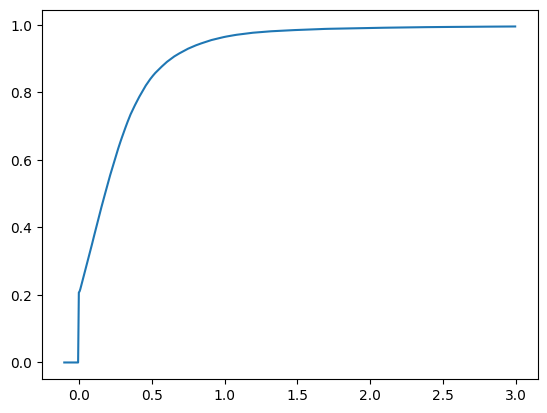

In [29]:
plt.plot(x_line,cd_xyspeed)

Text(0.5, 1.0, 'Cumulative distribution of xy-planar speed of rat FS10')

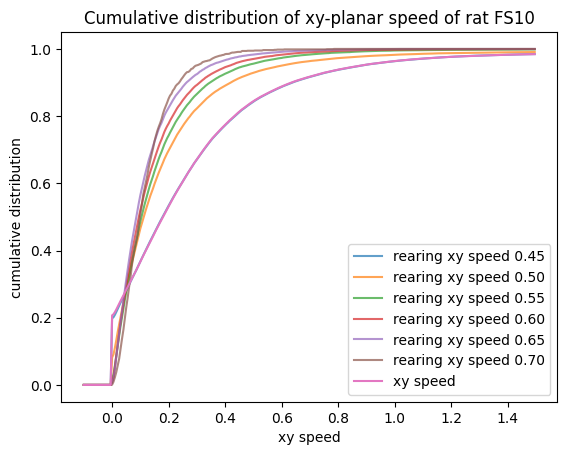

In [30]:
thresholds = [0.45,0.50,0.55,0.60,0.65,0.7]
for i,thresh in enumerate(thresholds):
    rear_idx = np.hstack(np.argwhere(this_tag.position_data[:,3]>= thresh))
    
    rearing_xyspeed = xy_speed[rear_idx]

    x_line, cd_rearing_xyspeed = calculate_cumulative_distribution(rearing_xyspeed, 0.005, set_max=True, max_x= 1.5, set_min= True, min_x= -0.1)
    x_line, cd_xyspeed = calculate_cumulative_distribution(xy_speed, 0.005, set_max=True, max_x= 1.5, set_min= True, min_x= -0.1)
    
    plt.plot(x_line, cd_rearing_xyspeed, label ='rearing xy speed %.2f'%thresh, alpha = 0.7)
plt.plot(x_line, cd_xyspeed, label = 'xy speed', )
plt.legend()
plt.xlabel('xy speed')
plt.ylabel('cumulative distribution')

plt.title('Cumulative distribution of xy-planar speed of rat %s'% rat_id)


# 3. whether pitch correlate with rearing

In [31]:
pitch = this_tag.position_data[:,6]

In [32]:
this_tag.position_data.shape

(108578, 7)

Text(0.5, 1.0, 'Cumulative distribution of pitch of rat FS10')

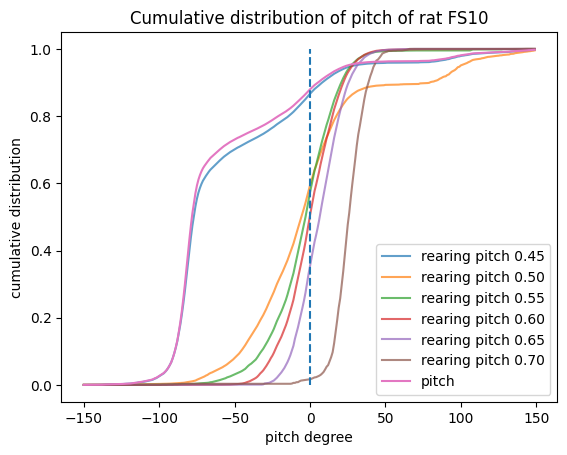

In [33]:
thresholds = [0.45,0.50,0.55,0.60,0.65,0.7]
for i,thresh in enumerate(thresholds):
    rear_idx = np.hstack(np.argwhere(this_tag.position_data[:,3]>= thresh))
    
    rearing_pitch = pitch[rear_idx]

    x_line, cd_rearing_pitch = calculate_cumulative_distribution(rearing_pitch, 1, set_max=True, max_x= 150, set_min= True, min_x= -150)
    x_line, cd_pitch = calculate_cumulative_distribution(pitch, 1, set_max=True, max_x= 150, set_min= True, min_x= -150)
    
    plt.plot(x_line, cd_rearing_pitch, label ='rearing pitch %.2f'%thresh, alpha = 0.7)
plt.plot(x_line, cd_pitch, label = 'pitch', )
plt.legend()
plt.xlabel('pitch degree')
plt.ylabel('cumulative distribution')
plt.vlines(0,0,1, linestyles='dashed')
plt.title('Cumulative distribution of pitch of rat %s'% rat_id)
    

# 4. Use height, pitch, xy-speed to determine the rearing period


In [34]:
n = 200 # number bins to eveluate
begin_idx = 400 # bins where to start
this_features = np.zeros((n,3))
this_features[:,0] = z[begin_idx: begin_idx+n]
this_features[:,1] = z_speed[begin_idx: begin_idx+n]
this_features[:,2] = xy_speed[begin_idx: begin_idx+n]

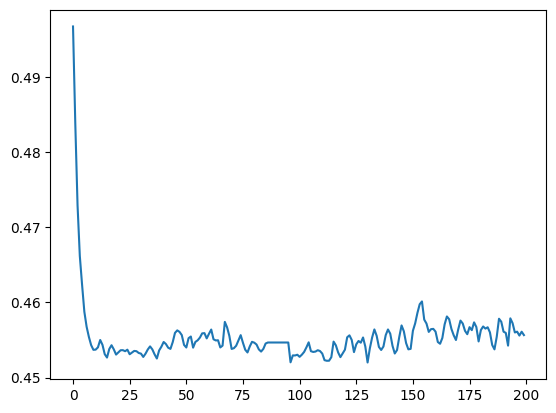

In [35]:
this_rearing = determine_rearing_period(this_features)
plt.plot(z[begin_idx: begin_idx+n])
plt.fill_between(this_rearing, np.min(z[begin_idx: begin_idx+n]), np.max(z[begin_idx: begin_idx+n]), alpha = 0.4)

## for more time period

Text(0.5, 0.98, 'Rearing period detection of rat FS10, height thresh = 0.60, bins = [0: 4000]')

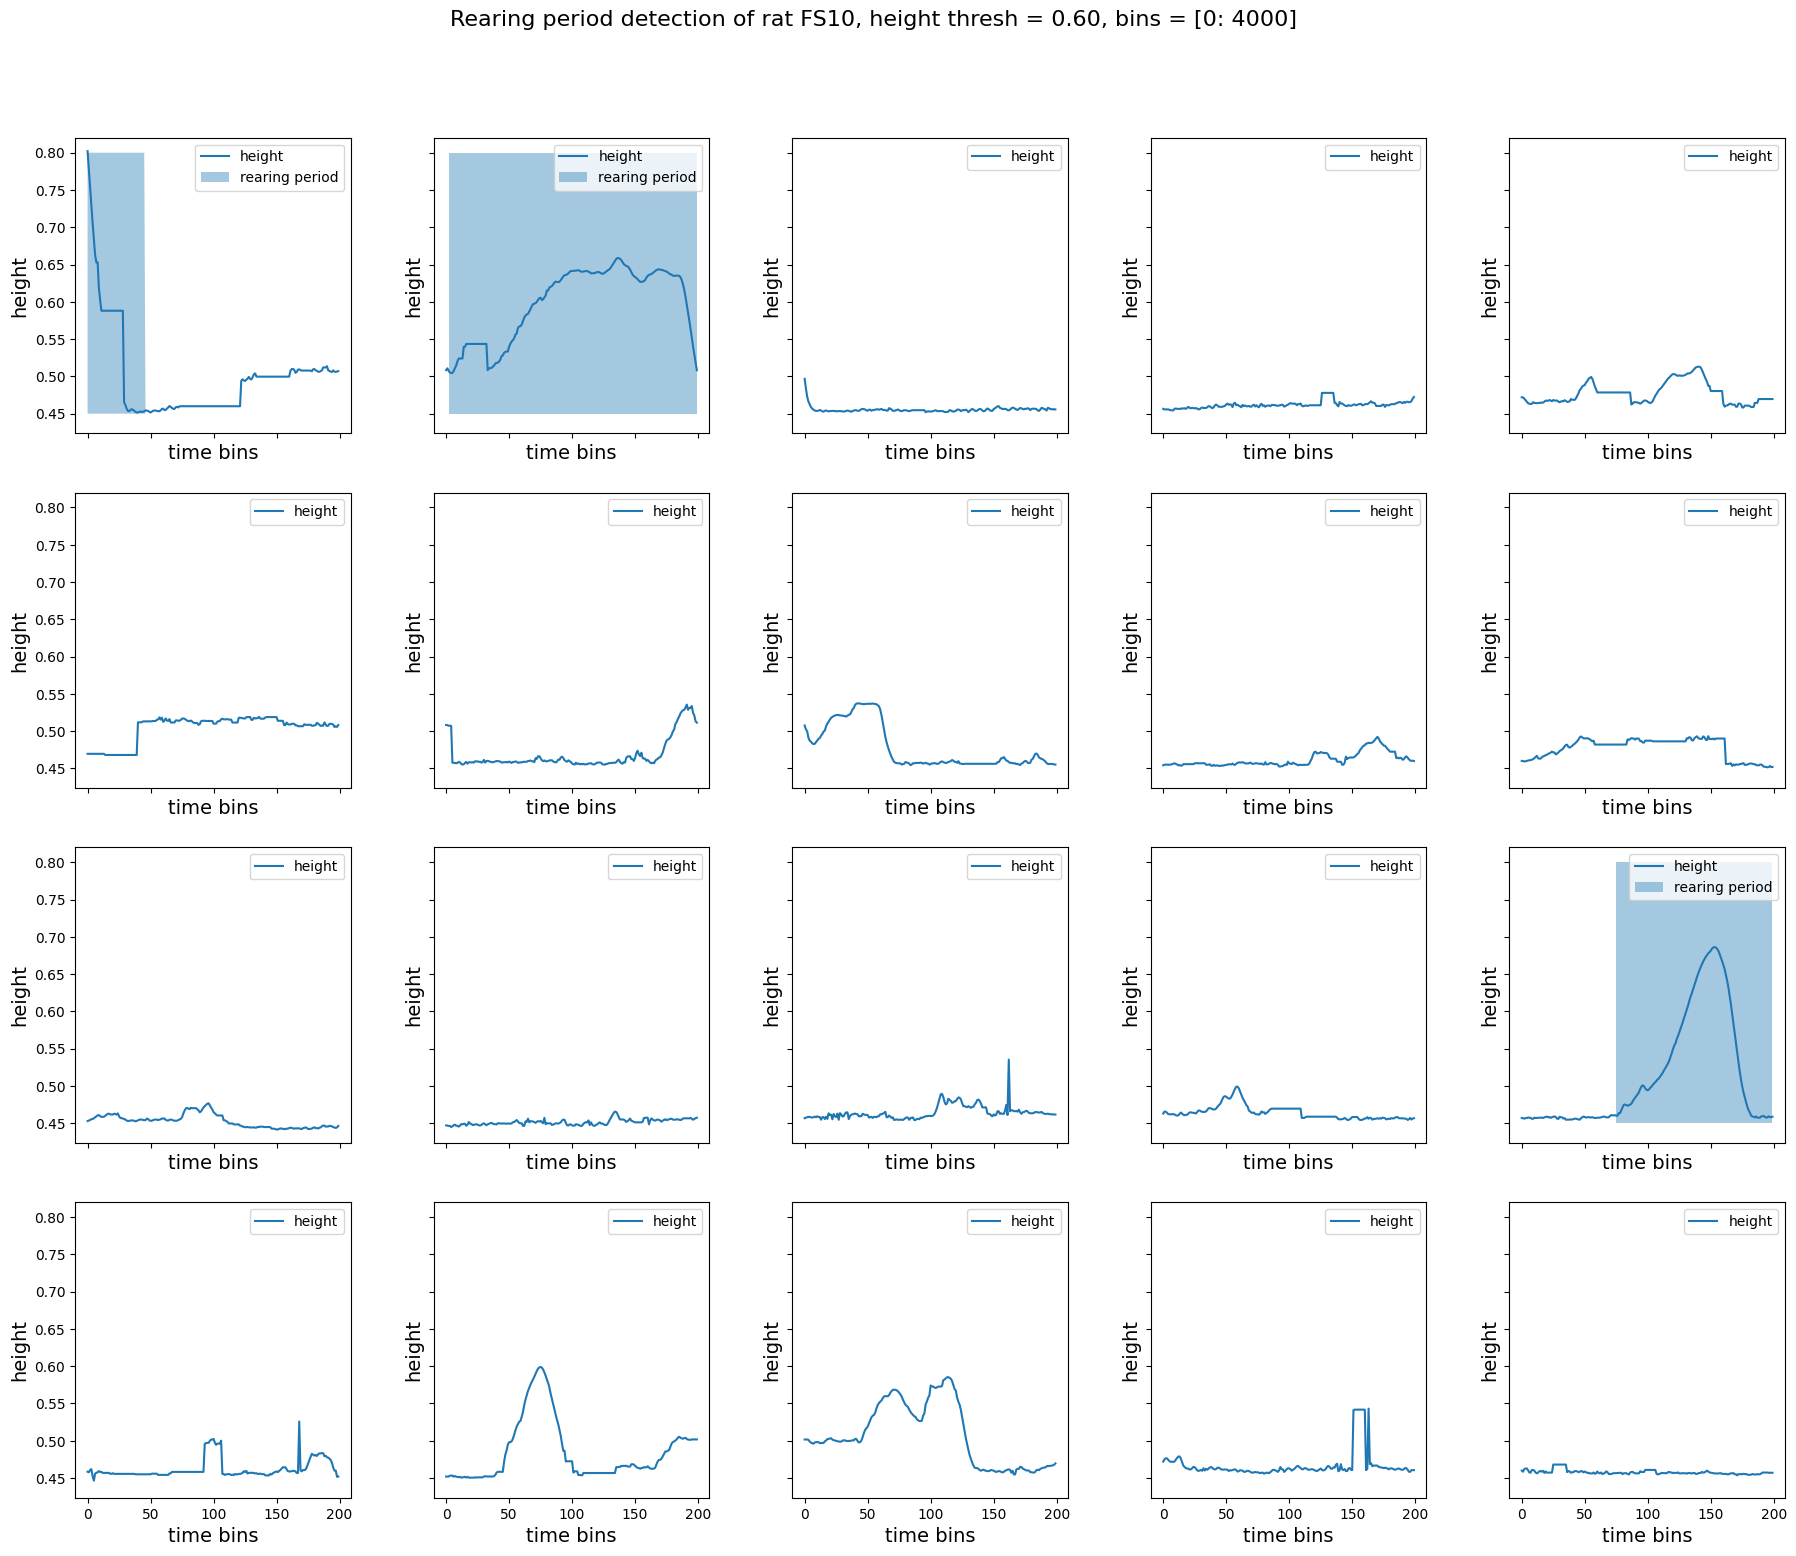

In [37]:
fig, axis = plt.subplots(4,5, figsize = (19,16), sharey = True, sharex = True)
axis = axis.flatten()

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.90,
                    hspace=0.2, wspace=0.3)


n =200 # total bins for each detection
N = n*20 # total bins we want to detect
Begin = 0 # index of bin where we want to start to detect 
begin_idxs = np.arange(Begin,Begin+N, n)
height_thresh = 0.60

for i,begin_idx in enumerate(begin_idxs):
    this_features = np.zeros((n,3))
    this_features[:,0] = z[begin_idx: begin_idx+n]
    this_features[:,1] = z_speed[begin_idx: begin_idx+n]
    this_features[:,2] = xy_speed[begin_idx: begin_idx+n]
    this_rearing = determine_rearing_period(this_features,height_thresh= height_thresh, zspeed_thresh=0.5, xspeed_drop_thresh=0.3, gap_tolerance= 5, total_tolerance=10, )
    
    
    # plot results
    axis[i].plot(z[begin_idx: begin_idx+n],label ='height')
    if len(this_rearing)>0:
        x_bool = np.zeros(n) ==1
        x_bool[this_rearing] = True
        axis[i].fill_between(np.arange(0,n), 0.45, 0.80, alpha = 0.4, label = 'rearing period', where = x_bool, interpolate = True, step = 'mid')
    axis[i].set_xlabel('time bins', fontsize = 14)
    axis[i].set_ylabel('height', fontsize = 14)
    
    
    axis[i].legend(loc =1)
    
title = 'Rearing period detection of rat %s, height thresh = %.2f, bins = [%d: %d]'%(rat_id, height_thresh, Begin, Begin+N)
fig.suptitle(title, fontsize = 16)
# fig.savefig('results/easy_method/%s/%s.png'%(rat_id, title), format ='png',)
    

In [ ]:
# fig, axis = plt.subplots(2,4, figsize = (15,8), sharey = True, sharex = True)
# axis = axis.flatten()

# fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.90,
#                     hspace=0.2, wspace=0.3)
# bin_len = 100
# labels = ['Positive z speed','Negative z speed','z speed = 0','all cases']
# rear_tags = ['rearing','non-rearing']
# for j, interest_idx in enumerate([rear_idx, nonrear_idx]):
#     for i,speed_idxs in enumerate([pos_speed_idx, neg_speed_idx, zero_speed_idx, interest_idx]):
#         this_idxs = np.intersect1d(speed_idxs, interest_idx)
#         this_idxs = np.delete(this_idxs, np.where(this_idxs < bin_len)) # drop the one without enough length
#         this_idxs = np.delete(this_idxs,  np.where(this_idxs + bin_len >= len(z)))

#         ## to get a [- bin_len :bin_len] bins on z for each rearing idx 
#         minus_idx = (this_idxs - bin_len).astype(int)
#         plus_idx = (this_idxs + bin_len).astype(int)
        
        
#         x = np.arange(- bin_len, bin_len, 1) * unit_time
#         z_list = [z[minus_idx[j]: plus_idx[j]] for j in range(this_idxs.shape[0])]
#         z_bins = np.asarray(z_list)
#         z_mean = np.mean(z_bins, axis = 0)
#         z_sem = sem(z_bins, axis = 0)
#         axis[i+j*4].plot(x,z_mean) 
#         axis[i+j*4].fill_between(x, z_mean - z_sem, z_mean + z_sem, alpha = 0.5)
#         axis[i+j*4].set_xlabel('time relative to the interested time point/ sec')
#         axis[i+j*4].set_ylabel('height')
#         axis[i+j*4].set_title('%s %s'%(rear_tags[j],labels[i]))
# fig.suptitle('threshold = %.2f, height of Rat %s given the rearing/non-rearing time'%(threshold,rat_id))

In [ ]:
# threshold = 0.50
# rear_idx = np.hstack(np.argwhere(this_tag.position_data[:,3]>= threshold))
# nonrear_idx = np.setdiff1d(np.arange(0,this_tag.position_data[:,3].shape[0]), rear_idx)
# print(rear_idx.shape)
# print(this_tag.position_data[:,3].shape)
# print('ratio: %.4f'% (rear_idx.shape[0]/this_tag.position_data[:,3].shape[0]))